In [1]:
pwd

'/Users/sathishrajendiran/ist718-python/Labs/Lab3'

* <font color=blue>Course: IST 718 </font> 
* <font color=blue>Authors: Sathish Kumar Rajediran</font> 
* <font color=blue>Task: Lab 3</font> 
* <font color=blue> Task Item:</font><font color=green> *Classifying simple fashion images from MNIST*</font> 
* <font color=blue>Date: June 3,2021</font> 

***

In [2]:
# !pip install helpers

<img src="Fashion-MNIST-images-2.png"  title="Fashion-MNIST-images" />

## Objective
This case study provides an opportunity to demonstrate our ability to combine data sets and produce meaningful analysis. Specifically, we would like to provide a decision maker with more than just data – we want to provide insights, understanding, and wisdom. This exercise allows the student an opportunity to demonstrate progress (or mastery) of learning objectives 1, 2, 3, 4, and 5:

1. Obtain data and understand data structures and data elements.
2. Scrub data using scripting methods, to include debugging, for data manipulation in R and other tools.
3. Explore data using essential qualitative analysis techniques including descriptive statistics.
4. Model relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users.
5. INterpret the data, model, analysis, and findings. Communicate the results in a meaningful way.

## Instructions
* The research question is can we use algorithms and compute to identify clothing items? Specifically, can we determine which algorithm and compute methodology provides us the most efficient approach for classifying simple fashion images?
* Using the base samples available from Zalando Research:
    * https://github.com/zalandoresearch/fashion-mnist
    * Review the data – clean as appropriate
    * Provide an initial data analysis
* Implement at least two approaches for classifying the digits – examples below:
    * Naïve bayes
    * Neural Networks
    * Keras
    * Azure ML
    * IBM DSX
    * Boosted trees
    * Linear classification
    * Your choice
* Answer the following questions:
    * What is the accuracy of each method?
    * What are the trade-offs of each approach?
    * What is the compute performance of each approach?

## Additional Instructions
* Don’t forget what you learned in your previous courses; do your own work, document any assistance, use comments for clarity.
* Report results for both the training set and the test set.
* Feel free to use any software to conduct your analysis and produce your graphics

## Submission Items
* Report with graphics
* Supporting notebook for the report
* Description of your tool and methodology if you used another statistical/software package

## Loading and Cleaning the Data

***

In [3]:
# !pip install tensorflow

In [4]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
import datetime
import time
import timeit
import warnings
import random
warnings.filterwarnings("ignore")

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
import itertools
import types
import math

# Import required packages for time series and model summary

import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report 

# TensorFlow and tf.keras
import tensorflow as tf
# print(tf.__version__)


from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D


from helpers import *

# from  multiprocessing import Pool, cpu_count

#Visualization packages
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


print('Libraries imported successfully!\n')
os.getcwd()

Libraries imported successfully!



'/Users/sathishrajendiran/ist718-python/Labs/Lab3'

In [5]:
# # Show all columns and do not truncate in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Pre-Processing

#### Obtain & Scrub the data

In [6]:
# ***********************************************************************************
# Working with Fashion-MNIST dataset 
#
#   1. Loads the Fashion-MNIST dataset.
#   2. Returns: Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)
#
# ***********************************************************************************


fashion_mnist = tf.keras.datasets.fashion_mnist 
## returns four numpy 28x28 arrays with pixel values ranging from 0 to #255

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

## Exploratory Analysis
***

> Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. — > John Tukey</cite>

In [9]:
# train_images[0]

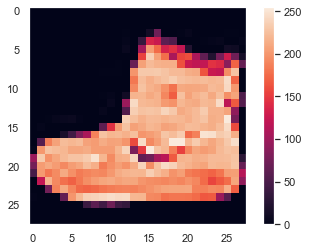

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Each image is mapped to a single label. Labels are nothing but the array of integers, ranging from 0 to 9 and correspond to the class of the clothing the image represents.

<img src="Fashion-MNIST-class-name.png"  title="Clothing Labels and Classes" />

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

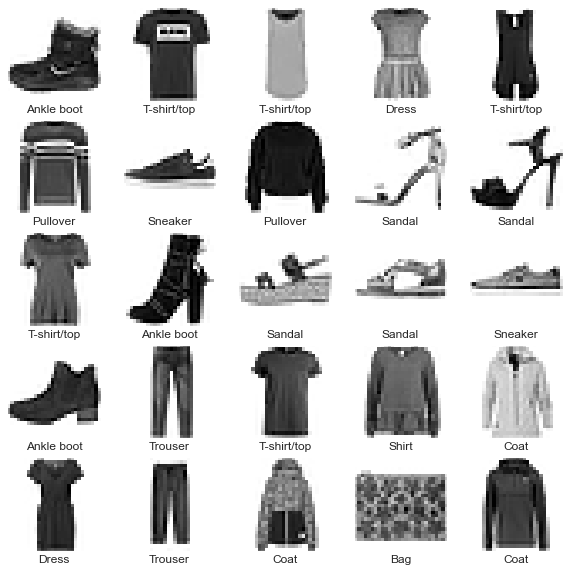

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

For both training and test sets, you can see that the pixel values of the images fall in the range of 0 to 255, which needs to be scaled in the range of 0 and 1 before feeding it in the neural network. To do so, divide the values by 255.

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
# train_images[0]

## Model Building
***

## Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training

In [15]:
# Build the architecture
# Model a simple 3-layer neural network

model_3layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


> 1. tf.keras.layers.Flatten— transforms the format of the images from a two-dimensional array (28 x 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Once the pixels are flattened, the network consists of a sequence of two dense layers.
> 2. tf.keras.layers.Dense — These 2 layers are dense/fully-connected, neural layers with 128 nodes in the first dense layer, and the second layer returns a logits array with a length of 10.</cite>

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function — Loss Function being one of the important components of Neural Networks is nothing but a prediction error of Neural Network. This measures how accurate the model is during training.
* Optimizer — This is how the model is updated based on the data it sees and its loss function. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data. It’s simple to use.
* Metrics — To monitor the training and testing steps, we use metrics. In this example, we will be using accuracy metrics, which indicates nothing but the fraction of the images that are correctly classified.

In [16]:
# Compile the model with "adam" Optimizer
model_3layers.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model_3layers.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Train the model

Training the neural network model requires 4 steps — Feed the training data, Learn, Predict, Verify the Prediction

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.

### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

* Epoch — one forward pass and one backward pass of all the training examples
* Iteration — number of passes, one forward pass and one backward pass
    * Example: if you have 1,000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

In [18]:
# Train the model, by fitting it to the training data
# 10 epochs, and split the training set into 80/20 for validation

starttime = time.time()

model_NN3 = model_3layers.fit(train_images, train_labels, epochs=10,validation_split=0.2)

print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 1.7162 - accuracy: 0.7552 - val_loss: 1.6811 - val_accuracy: 0.7822
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6767 - accuracy: 0.7866 - val_loss: 1.6736 - val_accuracy: 0.7894
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6671 - accuracy: 0.7954 - val_loss: 1.6846 - val_accuracy: 0.7788
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6613 - accuracy: 0.8004 - val_loss: 1.6601 - val_accuracy: 0.8018
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6564 - accuracy: 0.8055 - val_loss: 1.6611 - val_accuracy: 0.8011
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 1.6521 - accuracy: 0.8098 - val_loss: 1.6533 - val_accuracy: 0.8090
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6505 - accuracy: 0.8116 - val_loss: 1.6572 - val_accuracy:

In [19]:
# Build the architecture
# Model a simple 5-layer neural network

model_5layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model with "adam" Optimizer
model_5layers.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model, by fitting it to the training data
# 5 epochs, and split the training set into 80/20 for validation

starttime = time.time()

model_NN5 = model_5layers.fit(train_images, train_labels, epochs=10,validation_split=0.2)

print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7159 - accuracy: 0.7478 - val_loss: 1.6550 - val_accuracy: 0.8066
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6432 - accuracy: 0.8176 - val_loss: 1.6613 - val_accuracy: 0.7995
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6303 - accuracy: 0.8301 - val_loss: 1.6724 - val_accuracy: 0.7883
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6264 - accuracy: 0.8341 - val_loss: 1.6136 - val_accuracy: 0.8471
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6185 - accuracy: 0.8423 - val_loss: 1.6438 - val_accuracy: 0.8163
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6152 - accuracy: 0.8451 - val_loss: 1.6170 - val_accuracy: 0.8434
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6136 - accuracy: 0.8472 - val_loss: 1.6167 - val_accuracy:

In [20]:
# Define the model architecture.
model_3layers_NP = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

# Compile the model with "adam" Optimizer


model_3layers_NP.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the classification model
starttime = time.time()


model_NN3_NP = model_3layers_NP.fit(train_images,train_labels, epochs=10,  validation_split=0.2)

print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))


Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5008 - accuracy: 0.8257 - val_loss: 0.3750 - val_accuracy: 0.8686
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3497 - accuracy: 0.8781 - val_loss: 0.3390 - val_accuracy: 0.8823
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3142 - accuracy: 0.8897 - val_loss: 0.3161 - val_accuracy: 0.8907
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2936 - accuracy: 0.8973 - val_loss: 0.3077 - val_accuracy: 0.8923
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2793 - accuracy: 0.9012 - val_loss: 0.2979 - val_accuracy: 0.8987
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2656 - accuracy: 0.9069 - val_loss: 0.3056 - val_accuracy: 0.8909
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2567 - accuracy: 0.9095 - val_loss: 0.2932 - val_accuracy

In [21]:
!pip install tensorflow_model_optimization

### Fine-tune pre-trained model with pruning

* apply pruning to the whole model and see this in the model summary.

* start the model with 50% sparsity (50% zeros in weights) and end with 80% sparsity

In [22]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 10
validation_split = 0.2 # 20% of training set will be used for validation set. 

num_images = train_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_3layers_P = prune_low_magnitude(model_3layers_NP, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_3layers_P.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_3layers_P.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_reshape  (None, 28, 28, 1)         1         
_________________________________________________________________
prune_low_magnitude_conv2d ( (None, 26, 26, 12)        230       
_________________________________________________________________
prune_low_magnitude_max_pool (None, 13, 13, 12)        1         
_________________________________________________________________
prune_low_magnitude_flatten_ (None, 2028)              1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 10)                40572     
Total params: 40,805
Trainable params: 20,410
Non-trainable params: 20,395
_________________________________________________________________


In [23]:
import tempfile
import os


logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]
# Train the classification model
starttime = time.time()

model_NN3_P = model_3layers_P.fit(train_images, train_labels,
                  batch_size=128, epochs=10, validation_split=.2,callbacks=callbacks)

print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

Epoch 1/10
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
375/375 [==============================] - 7s 14ms/step - loss: 0.2638 - accuracy: 0.9066 - val_loss: 0.2999 - val_accuracy: 0.8939
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2578 - accuracy: 0.9076 - val_loss: 0.3080 - val_accuracy: 0.8909
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2693 - accuracy: 0.9038 - val_loss: 0.3158 - val_accuracy: 0.8895
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2676 - accuracy: 0.9055 - val_loss: 0.3109 - val_accuracy: 0.8880
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2810 - accuracy: 0.9008 - val_loss: 0.3250 - val_accuracy: 0.8825
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2834 - accuracy: 0.8985 - val_loss: 0.3163 - val_accuracy: 0.8852
Epoc

 > Training will show you the following results per epoch, note that with each epoch, the loss decreases and the accuracy increases, meaning our model is improving.

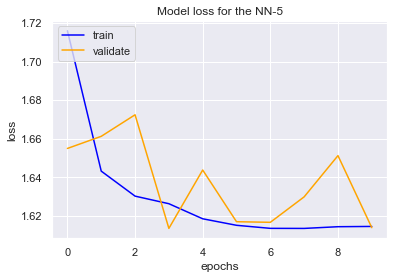

In [24]:
#Plot loss results for training data and testing data
plt.plot(model_NN5.history['loss'], 'blue')
plt.plot(model_NN5.history['val_loss'], 'orange')
plt.title('Model loss for the NN-5')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validate'], loc='upper left')

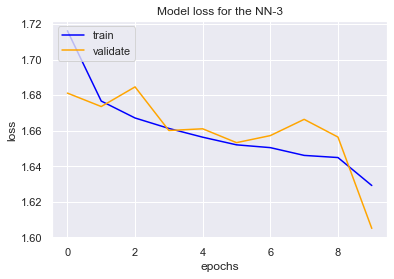

In [25]:
#Plot loss results for training data and testing data
plt.plot(model_NN3.history['loss'], 'blue')
plt.plot(model_NN3.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validate'], loc='upper left')

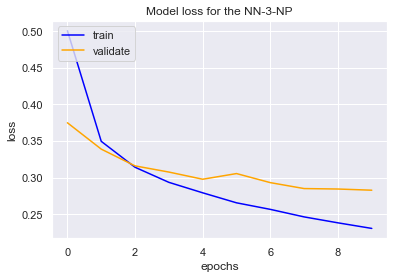

In [26]:
#Plot loss results for training data and testing data
plt.plot(model_NN3_NP.history['loss'], 'blue')
plt.plot(model_NN3_NP.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3-NP')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validate'], loc='upper left')

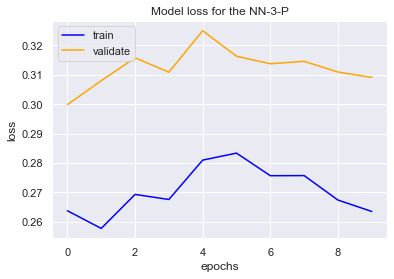

In [27]:
#Plot loss results for training data and testing data
plt.plot(model_NN3_P.history['loss'], 'blue')
plt.plot(model_NN3_P.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3-P')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validate'], loc='upper left')

You can see that loss and accuracy are calculated in each epoch. The model achieved an accuracy of around 92% on the training data.

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [28]:
# Evaluate the model

test_loss, test_acc = model_3layers.evaluate(test_images,  test_labels, verbose=2)

print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

313/313 - 0s - loss: 1.6119 - accuracy: 0.8506
Model - 3 layers - test loss: 161.1879587173462
Model - 3 layers - test accuracy: 85.0600004196167


In [29]:
# Evaluate the model

test_loss, test_acc = model_5layers.evaluate(test_images,  test_labels, verbose=2)

print("Model - 5 layers - test loss:", test_loss * 100)
print("Model - 5 layers - test accuracy:", test_acc * 100)

313/313 - 1s - loss: 1.6207 - accuracy: 0.8401
Model - 5 layers - test loss: 162.07263469696045
Model - 5 layers - test accuracy: 84.00999903678894


In [30]:
# Evaluate the model

test_loss, test_acc = model_3layers_NP.evaluate(test_images,  test_labels, verbose=2)

print("Model - 3 layers Without Pruning - test loss:", test_loss * 100)
print("Model - 3 layers Without Pruning - test accuracy:", test_acc * 100)

313/313 - 1s - loss: 0.3247 - accuracy: 0.8876
Model - 3 layers Without Pruning - test loss: 32.46542811393738
Model - 3 layers Without Pruning - test accuracy: 88.76000046730042


In [31]:
# Evaluate the model

test_loss, test_acc = model_3layers_P.evaluate(test_images,  test_labels, verbose=2)

print("Model - 3 layers with Pruning - test loss:", test_loss * 100)
print("Model - 3 layers with Pruning - test accuracy:", test_acc * 100)

313/313 - 1s - loss: 0.3247 - accuracy: 0.8876
Model - 3 layers with Pruning - test loss: 32.46542811393738
Model - 3 layers with Pruning - test accuracy: 88.76000046730042


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

### Make predictions
With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [32]:
probability_model = tf.keras.Sequential([model_3layers_P, 
                                         tf.keras.layers.Softmax()])


In [33]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([4.0730120e-06, 2.9434448e-09, 2.5299603e-06, 3.1801261e-07,
       2.2576153e-06, 2.8838795e-03, 1.1659735e-05, 8.3824277e-02,
       2.3306010e-03, 9.1094041e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
test_labels[0]

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

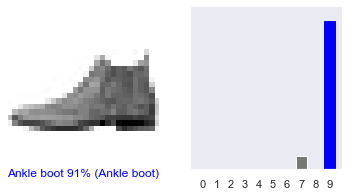

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

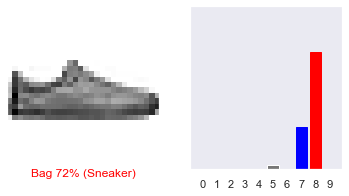

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

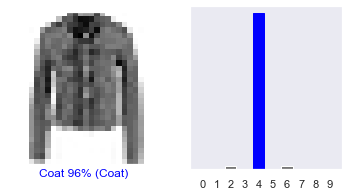

In [40]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

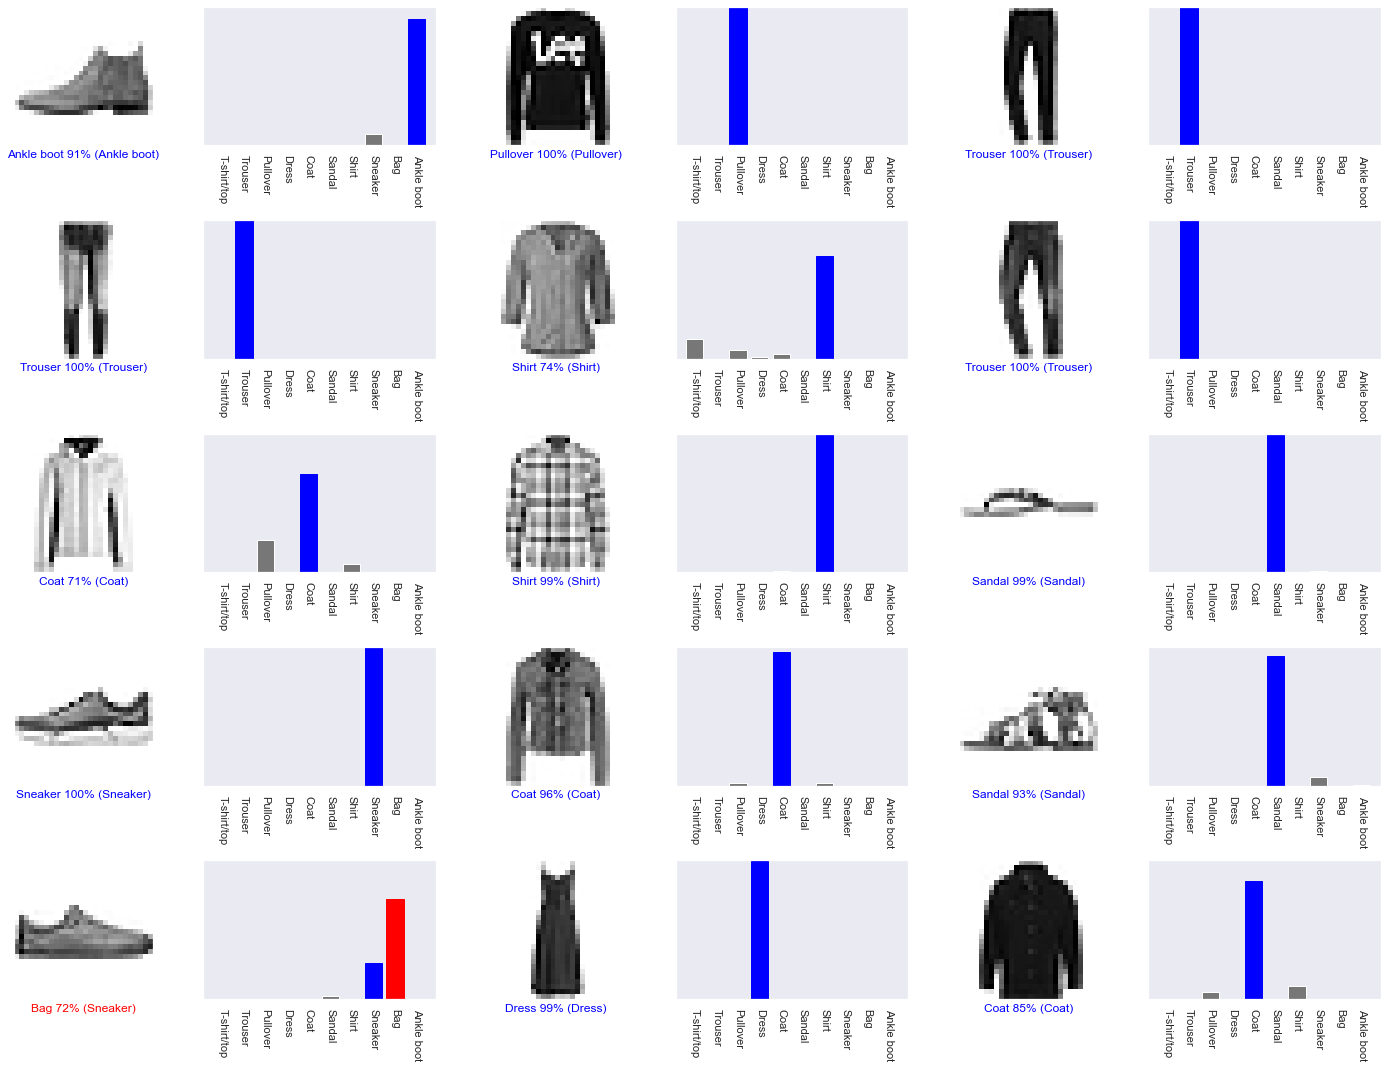

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
# plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.figure(figsize=(20,15))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
  _ = plt.xticks(range(10), class_names, rotation=270)
plt.tight_layout()
plt.show()

In [42]:
# Grab an image from the test dataset.
img = test_images[10]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [43]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.7845947e-05 5.2362152e-06 1.8985515e-02 1.6220604e-06 9.6046287e-01
  5.0451003e-09 2.0474313e-02 1.7277587e-13 2.4188876e-06 6.6371165e-08]]


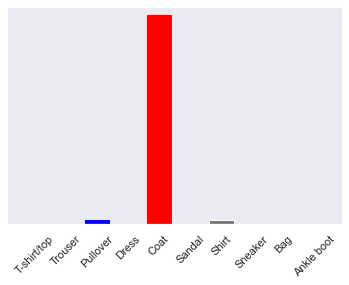

In [44]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

## Model Evaluation and Summary
***

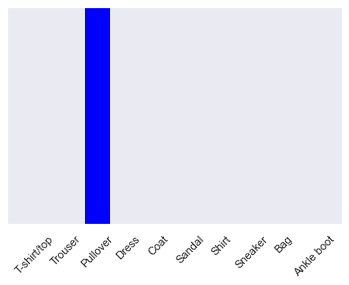

In [45]:
img_1 = test_images[1]
img_1 = (np.expand_dims(img_1,0))
predictions_single_1 = probability_model.predict(img_1)

# print(predictions_single)


#Plot
plot_value_array(1, predictions_single_1[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


### Conventional Models

Train label 0 count :6000
Test label 0 count :1000
Train label 1 count :6000
Test label 1 count :1000
Train label 2 count :6000
Test label 2 count :1000
Train label 3 count :6000
Test label 3 count :1000
Train label 4 count :6000
Test label 4 count :1000
Train label 5 count :6000
Test label 5 count :1000
Train label 6 count :6000
Test label 6 count :1000
Train label 7 count :6000
Test label 7 count :1000
Train label 8 count :6000
Test label 8 count :1000
Train label 9 count :6000
Test label 9 count :1000


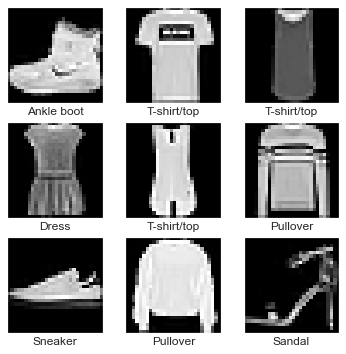

In [46]:
# For classification purposes in python, it will be much better to convert our 2d array into a 1d array, filling in row by row.
# Then we turn our flattened array into a numpy array object. 
def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l
train_images_mod = convert(train_images)
test_images_mod  = convert(test_images)

# We check the distribution of labels

for i in range(10):
    print ('Train label ' + str(i) + ' count :' + str(len([j for j in train_labels if j==i])))
    print ('Test label ' + str(i) + ' count :' + str(len([j for j in test_labels if j==i])))

# Before procesing further, let us plot some items and their corresponding classes.

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.savefig('image_examples.jpg')
plt.show()

### Logistic Regression multi-class performance

In [47]:
# Initialize Multinomial Logistic Regression Model
LR = LogisticRegression()
LR.fit(train_images_mod, train_labels)

# Predict labels according
Y_pred = LR.predict(test_images_mod)

# Print accuracy on test data and labels
accuracy = LR.score(test_images_mod, test_labels)

# Print Confusion Matrix
conf_matrix =  confusion_matrix(test_labels, Y_pred)

print(f"LR Model's accuracy: {accuracy}")

LR Model's accuracy: 0.8439


In [48]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(LR, class_names)

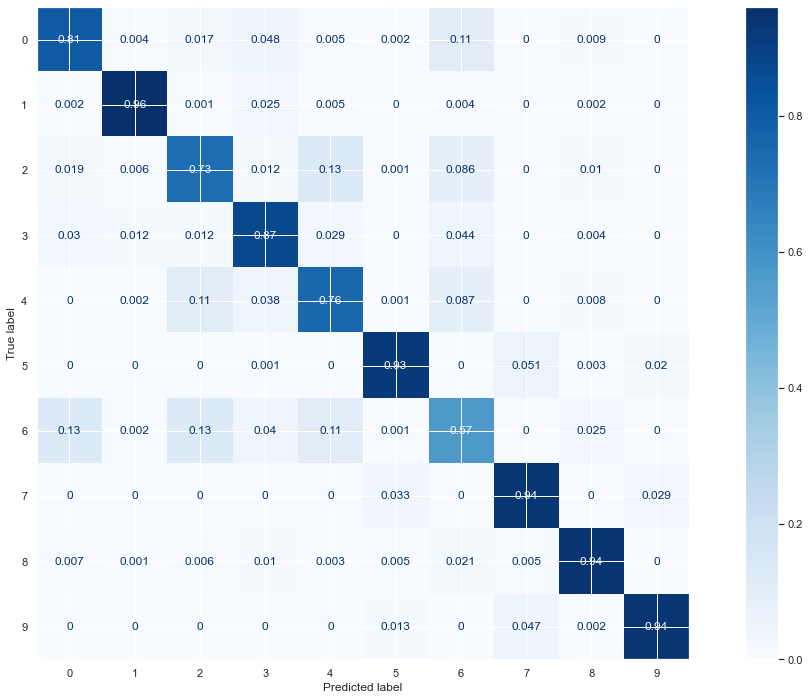

In [49]:
figsize = (20,12)
plot_confusion_matrix(LR, test_images_mod, test_labels,cmap="Blues", normalize='true',ax=plt.subplots(figsize=figsize)[1])

 
 As we can see from the confusion matrix above, the classifier has greater difficulty on correctly classifying class 6, since it miss-classifies it as class 0, 2 or 4. On the contrary, it specifically performs very well on classes 1, 3, 5, 7 and 9, with small amounts of samples being miss-classified as different classes.


### Dimensionality reduction - Principal Component Analysis
As our data is highly dimensional (784 dimensions), we will resort to the feature selection type of dimensionality reduction, called principal component analysis. We will calculate first 40 principal components. Then we will make a scree plot, and find the number of components that we are going to use in our calculations.

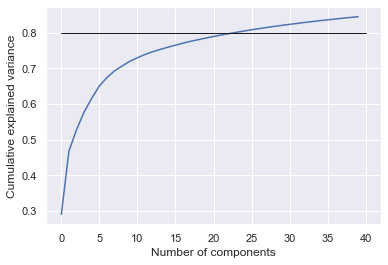

In [50]:
pca = PCA(n_components=40)
pca_fit = pca.fit_transform(train_images_mod)
variances = pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,40],[0.8,0.8],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

### Multinomial logistic regression
Second approach that we will use to analyze our dataset is Multinomial logistic regression. We will use the lasso and regularisation, and compare results obtained using them. We will perform it both on principal components. We will use the pipeline approach with 25 PCs. Approach that will be used is One-Vs-Rest approach, which trains K binary classifiers, where K is the number of classes. Pipeline is tool in sklearn that enables us to combine in one step the transformations of data, and the final estimator.

In [51]:
pipe_log_reg_l2 = Pipeline([('pca',PCA(n_components=25)),('clf',LogisticRegression(multi_class='ovr',penalty='l2',solver='saga'))])
pipe_log_reg_l2.fit(train_images_mod,train_labels)
pred_labels_pipe_log_reg_l2 = pipe_log_reg_l2.predict(test_images_mod)
test_acc_pipe_l2 = accuracy_score(pred_labels_pipe_log_reg_l2,test_labels)
print('Test accuracy of logistic regression on 25 PCs with l2 penalty : ' + str(test_acc_pipe_l2))

Test accuracy of logistic regression on 25 PCs with l2 penalty : 0.7983


### K-nearest neighbors and Nearest centroid
K-nearest neighbors algorithm will be implemented with respect to L1 and L2 distances on the 12 neighbors. We choose 12 neighbors, in order to avoid overfitting. We introduce the nearest centroid as well, in order to see if elements of the same class are clustered around some mean value.

In [52]:
# 12 nearest neighbors with respect to L1 distance
starttime = time.time()
knn_L1 = KNeighborsClassifier(n_neighbors=12,metric='manhattan')
knn_L1.fit(train_images_mod,train_labels)
knn_L1_pred_test_labels    = knn_L1.predict(test_images_mod)
knn_L1_test_acc            = accuracy_score(knn_L1_pred_test_labels,test_labels)
print('Test accuracy for 12-nearest neighbors with L1 metric is equal to :' + str(knn_L1_test_acc))
print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))


# 12 nearest neighbors with respect to L2 distance
starttime = time.time()
knn_L2 = KNeighborsClassifier(n_neighbors=12,metric='euclidean')
knn_L2.fit(train_images_mod,train_labels)
knn_L2_pred_test_labels    = knn_L2.predict(test_images_mod)
knn_L2_test_acc            = accuracy_score(knn_L2_pred_test_labels,test_labels)
print('Test accuracy for 12-nearest neighbors with L2 metric is equal to :' + str(knn_L2_test_acc))
print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

# K-nearest centroids with respect to L1 distance from the nearest centroid
starttime = time.time()
knc_L1 = NearestCentroid(metric='manhattan')
knc_L1.fit(train_images_mod,train_labels)
knc_L1_pred_test_labels = knc_L1.predict(test_images_mod)
knc_L1_test_acc = accuracy_score(knc_L1_pred_test_labels,test_labels)
print('Test accuracy for k-nearest centroids is equal to :' + str(knc_L1_test_acc))
print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

# K-nearest centroids with respect to L2 distance from the nearest centroid
starttime = time.time()
knc_L2 = NearestCentroid(metric='euclidean')
knc_L2.fit(train_images_mod,train_labels)
knc_L2_pred_test_labels = knc_L2.predict(test_images_mod)
knc_L2_test_acc = accuracy_score(knc_L2_pred_test_labels,test_labels)
print('Test accuracy for k-nearest centroids is equal to :' + str(knc_L2_test_acc))
print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

Test accuracy for 12-nearest neighbors with L1 metric is equal to :0.8568
...runtime: 11.48 minutes
Test accuracy for 12-nearest neighbors with L2 metric is equal to :0.8471
...runtime: 10.99 minutes
Test accuracy for k-nearest centroids is equal to :0.6566
...runtime: 0.03 minutes
Test accuracy for k-nearest centroids is equal to :0.6768
...runtime: 0.00 minutes


### Support vector machines
Due to high dimensionality of data, we should resort usa of PCs. We will select 25PCs, as they select an amount of variance with which we believe we can get satisfactory results. We will apply the rbf (Gaussian) and polynomial kernel.

In [53]:
# SVM with rbf kernel.
starttime = time.time()
pipe_svm_1 = Pipeline([('pca', PCA(n_components=25)),('clf',SVC(C=100,kernel='rbf',gamma=0.1))])
pipe_svm_1.fit(train_images_mod,train_labels)
pipe_svm_1_pred_labels = pipe_svm_1.predict(test_images_mod)
pipe_svm_1_acc = accuracy_score(pipe_svm_1_pred_labels,test_labels)
print('The accuracy of SVM classifier with rbf kernel is equal to :' + str(pipe_svm_1_acc))
print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

# SVM with polynomial kernel.
starttime = time.time()
pipe_svm_2 = Pipeline([('pca', PCA(n_components=25)),('clf', SVC(C=100,kernel='poly',degree=5))])
pipe_svm_2.fit(train_images_mod,train_labels)
pipe_svm_2_pred_labels = pipe_svm_2.predict(test_images_mod)
pipe_svm_2_acc = accuracy_score(pipe_svm_2_pred_labels,test_labels)
print('The accuracy of SVM classifier with polynomial kernel of degree five is equal to :' + str(pipe_svm_2_acc))
print("...runtime: {:.2f} minutes".format((time.time() - starttime)/60.0))

The accuracy of SVM classifier with rbf kernel is equal to :0.8638
...runtime: 1.58 minutes
The accuracy of SVM classifier with polynomial kernel of degree five is equal to :0.8691
...runtime: 1.52 minutes


## Summary and Conclusion
***
 In this exercise, We have looked at various classification algorithms on the Fashion MNIST dataset. Traditional machine learning methods including Multinomial Logistic Regression, K-Nearest neighbors , Nearest centroid, Supply Vector machines and Random forest were experimented. In addition, We have also explored deep learning algorithm using convolutional neural network.
  * Fashion MNIST had 70,000 observations made of images of 10 different cloothing objects.
  * 60,000 were included in the training set and 10,000 as test set.Items were distributed evenly.
  * Each image was represented as 28*28 pixels
  * Rotated accordingly and represented in grayscale with integer values from o to 255.
  * Blank space were represented by black color with value 0
  * For traditional models, Principal component analysis was performed to reduce the dimensions and reduced to 25 principal components ( ~3% of total number of PCs).Around 70% of the cumulative variance was explained by only 8 PCs.
      * Multinomial Logistic Regression
      * Nearest neighbors and centroid algorithms
      * Support Vector Machines (SVM)
  * Keras library had the images already processed reducing the pre-processing efforts.However, images were converted from 2D array into 1D array to easier to work with.
  * CNN model was made  with simple 3 and 5 layer architecture.
      * Two sets of dense layers, with the first one selecting 128 features, having relu and softmax activation
      * First layer was used to flatten the images into 28 * 28 
      * Number of epochs were tried between 5 to 15. 
      * Loss function - categorical cross-entropy used
      * To avoid overfitting, cross validation with 90:10 ratio applied
      * Optimizer "adam" was used to improve standard gradient decent methods.
      * As part of model optimzation, Models were trained without pruning and fine tuned pre-trained model with pruning.Model was started with 50% sparsity and ended with 80% sparsity.
      
### Conclusion

<img src="conclusion_1.png"  title="Model Analysis" />

Based on the experiments above, CNNs looked better compared to traditional models almost reaching 89% accuracy.Its mainly because the deep learning model can transfer learning through layers, saving inferences and making new ones on subsequent layers. Feature extraction is done during training.So, no need for feature extraction before using the algorithm.  

## Next Steps
***

Although, CNN model produced ~89% accuracy, however, it did fail to recognize some of the images. Probably, further tuning is needed on the parameters. May be , should have applied PCA components to CNN models to see the difference. Or could perform other image processing tasks like sharpening, smoothing etc.

## References
***

1. https://www.tensorflow.org/tutorials/keras/classification
2. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
3. https://www.programcreek.com/python/example/112445/keras.datasets.fashion_mnist.load_data
4. https://www.tensorflow.org/model_optimization/guide/pruning/pruning_with_keras
5. https://towardsdatascience.com/image-classification-with-fashion-mnist-why-convolutional-neural-networks-outperform-traditional-df531e0533c2
6. https://medium.datadriveninvestor.com/classify-images-of-clothing-using-tensorflow-7bc71b357739
7. https://www.kaggle.com/mdmashurshalehin/plotting-confusion-matrix-for-tensorflow-model?scriptVersionId=63046076&cellId=16
8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html